In [1]:
import keras
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np
import tensorflow as tf


Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


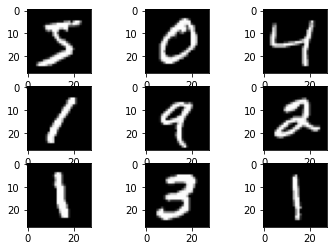

In [28]:
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [29]:
trainX = trainX.reshape((trainX.shape[0],28,28,1))
testX = testX.reshape((testX.shape[0],28,28,1))

In [30]:
trainy = keras.utils.to_categorical(trainy)
testy = keras.utils.to_categorical(testy)

In [31]:
trainX_norm = trainX.astype('float32')
testX_norm = testX.astype('float32')

trainX_norm = trainX_norm/255.0 
testX_norm = testX_norm/255.0

In [32]:
from keras import layers
model = keras.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
#model.add(layers.Conv2D(64,(3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(trainX_norm,trainy, batch_size=128, epochs=10, validation_data=(testX_norm,testy))

Epoch 1/10
469/469 [==============================] - 27s 57ms/step - loss: 0.4544 - accuracy: 0.8710 - val_loss: 0.0853 - val_accuracy: 0.9747
Epoch 2/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0720 - accuracy: 0.9799 - val_loss: 0.0584 - val_accuracy: 0.9795
Epoch 3/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0471 - accuracy: 0.9858 - val_loss: 0.0485 - val_accuracy: 0.9837
Epoch 4/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0347 - accuracy: 0.9898 - val_loss: 0.0501 - val_accuracy: 0.9839
Epoch 5/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0259 - accuracy: 0.9923 - val_loss: 0.0519 - val_accuracy: 0.9833
Epoch 6/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0201 - accuracy: 0.9942 - val_loss: 0.0388 - val_accuracy: 0.9870
Epoch 7/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0149 - accuracy: 0.9957 - val_loss: 0.0489 - val_accuracy:

In [35]:
score = model.evaluate(testX_norm,testy, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.04712264612317085
Test accuracy: 0.9854999780654907


In [36]:
prediction=model.predict(testX_norm)

In [37]:
print(np.argmax(prediction[0]))

7


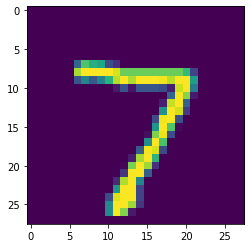

In [38]:
pyplot.imshow(  tf.squeeze(testX[0])  )

pyplot.show()